
***The problem is formulated as a supervised regression task where Weekly Sales is the target variable. Historical sales, economic indicators, promotional markdowns, and holiday information are used as predictors.***



In [41]:
from google.colab import files
uploaded = files.upload('train.csv')

Saving train.csv to train.csv/train (3).csv


In [42]:
from google.colab import files
uploaded = files.upload('features.csv')

Saving features.csv to features.csv/features (4).csv


In [43]:
from google.colab import files
uploaded = files.upload('stores.csv')

Saving stores.csv to stores.csv/stores (2).csv


**STEP 1:** Importing Libraries and Loading Datasets for Data Analysis & Machine Learning.

In [44]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train=pd.read_csv('train.csv/train.csv')
store=pd.read_csv('stores.csv/stores.csv')
feature=pd.read_csv('features.csv/features.csv')

**STEP 2:** Previewing the Datasets train and features Using head() Function.


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
merge_df=pd.merge(train,feature, on=['Store','Date'], how='inner')

merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**STEP 3:** Statistical Summary of the Merged Dataset

In [ ]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


**STEP 4:** Converting Date Column into DateTime Object.

In [ ]:
from datetime import datetime as dt
merge_df['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

,DateTimeObj
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


**Visualizing Weekly Sales Over Time for Store 1.**



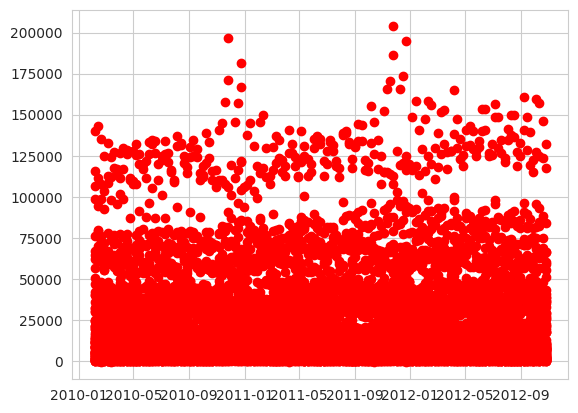

In [ ]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [ ]:
#Aggregating Weekly Sales by Store and Date

weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1643690.90
       2010-02-12    1641957.44
       2010-02-19    1611968.17
       2010-02-26    1409727.59
       2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64

In [ ]:
#Calculating Total Weekly Sales by Store and Department

weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       3219405.18
       2       6592598.93
       3       1880518.36
       4       5285874.09
       5       3468885.58
Name: Weekly_Sales, dtype: float64

In [ ]:
#Converting Grouped Sales Data into a DataFrame

weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [ ]:
#Merging Weekly Sales Data with Store Features

walmartstore=pd.merge(weeklyscale, feature, on=['Store', 'Date'], how='inner')
walmartstore.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#Selecting Relevant Columns for Model Building

walmartstoredf = walmartstore.iloc[:, list(range(5)) + list(range(10,13))]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False


In [ ]:
#Creating a Week Number Feature from Date for Time-Series Analysis

walmartstoredf['DateTimeObj'] = [dt.strptime(x, '%Y-%m-%d') for x in list(walmartstoredf['Date'])]
weekNo=walmartstoredf.reset_index()
weekNo = [(x - walmartstoredf['DateTimeObj'][0]) for x in list(walmartstoredf['DateTimeObj'])]
walmartstoredf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0


**Visualizing Weekly Sales Trend Over Time**

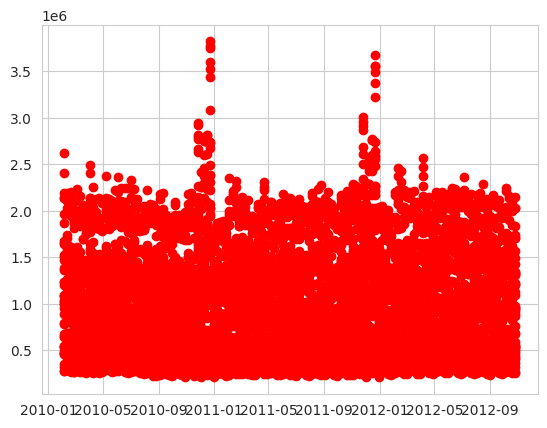

In [ ]:
plt.plot(walmartstoredf.DateTimeObj, walmartstoredf.Weekly_Sales, 'ro')
plt.show()

In [ ]:
#Converting Holiday Indicator into Numerical Format

walmartstoredf['IsHolidayInt'] = [int(x) for x in list(walmartstoredf.IsHoliday)]
walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,IsHolidayInt
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,0
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,1
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,0
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,0


In [ ]:
#Identifying Unique Store IDs in the Dataset
walmartstoredf.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

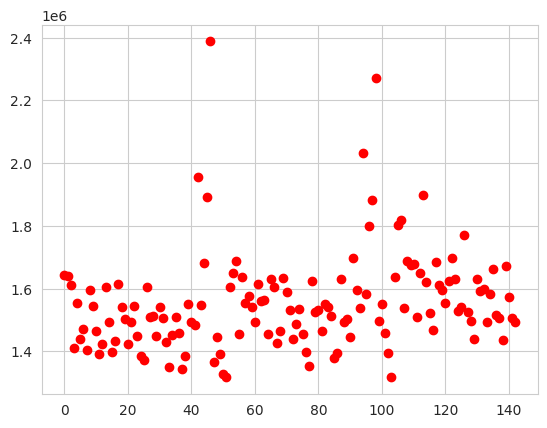

In [ ]:
#Splitting the Dataset into Training and Testing Sets and Visualizing Store-wise Sales Trend

train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
plt.plot(walmartstoredf[(walmartstoredf.Store==1)].Week, walmartstoredf[(walmartstoredf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTrain = train_WM['Weekly_Sales']
XTest = test_WM[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'IsHolidayInt']]
YTest = test_WM['Weekly_Sales']
wmLinear = linear_model.LinearRegression()
wmLinear.fit(XTrain, YTrain)

LinearRegression()

In [ ]:
wmLinear.coef_

array([  -308.15266303,  -8747.78318227,  -1668.0479916 , -45058.54212884,
         -148.87164691,  95666.79893475])

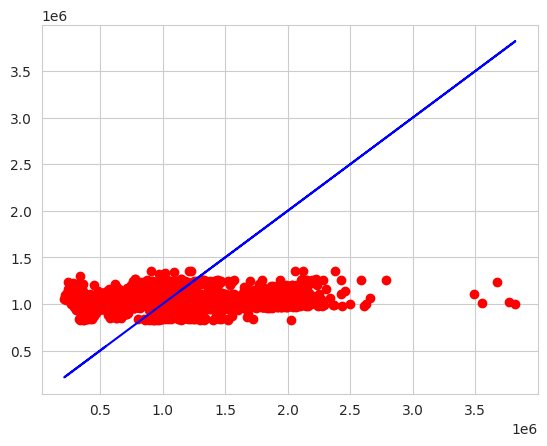

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)


plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
walmartstoredf['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
Store_Dummies = pd.get_dummies(walmartstoredf.Store, prefix='Store').iloc[:,1:]
walmartstoredf = pd.concat([walmartstoredf, Store_Dummies], axis=1)

walmartstoredf.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,DateTimeObj,Week,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,2010-02-05,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,2010-02-12,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,2010-02-19,2.0,...,False,False,False,False,False,False,False,False,False,False
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,2010-02-26,3.0,...,False,False,False,False,False,False,False,False,False,False
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,2010-03-05,4.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_WM, test_WM = train_test_split(walmartstoredf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTrain = train_WM.Weekly_Sales

XTest = test_WM.iloc[:,([3,4,5,6] + [9,10]) + list(range(11,walmartstoredf.shape[1]))]
yTest=test_WM.Weekly_Sales


XTrain.head()

,Temperature,Fuel_Price,CPI,Unemployment,Week,IsHolidayInt,Store_2,Store_3,Store_4,Store_5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
1288,49.96,2.828,126.496258,9.765,1.0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1115,65.19,3.891,225.062571,5.679,114.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
582,65.30,2.808,211.038853,6.465,10.0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3647,56.94,3.851,135.265267,7.818,72.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1564,86.49,3.638,225.829306,6.334,134.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
wmLinear = linear_model.LinearRegression()
wmLinear.fit(XTrain, YTrain)

LinearRegression()

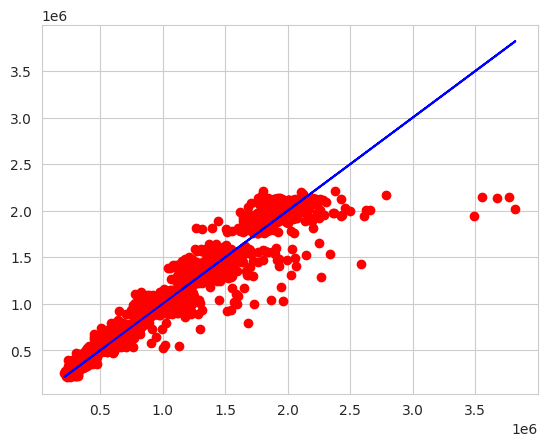

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print("MAPE:", MAPE)
print("MSSE:", MSSE)


from sklearn.metrics import r2_score, mean_squared_error

rmse = np.sqrt(mean_squared_error(YTest, YHatTest))
r2 = r2_score(YTest, YHatTest)

print("RMSE:", rmse)
print("R² Score:", r2)


MAPE: 0.08956881121001263
MSSE: 26699670214.637077
RMSE: 163400.33725374338
R² Score: 0.9164906274809476


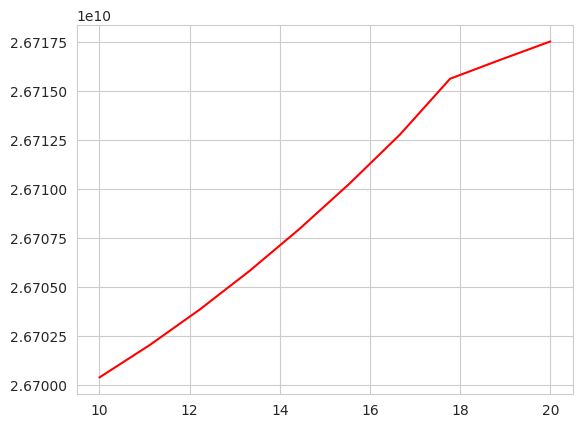

In [ ]:
# Dimensionality Reduction
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alphas = np.linspace(10, 20, 10)
testError = np.empty(10)

for i, alpha in enumerate(alphas) :

    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))
plt.plot(alphas, testError, 'r-')
plt.show()

In [ ]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)

lasso_coef = pd.Series(lasso.coef_, index=XTrain.columns)
selected_features = lasso_coef[lasso_coef != 0]

selected_features


,0
Temperature,-7.671964e+02
Fuel_Price,-5.188574e+04
CPI,4.754513e+03
Unemployment,-1.642454e+04
Week,5.670375e+01
IsHolidayInt,7.420194e+04
Store_2,3.894977e+05
Store_3,-1.150866e+06
Store_4,9.360229e+05
Store_5,-1.241648e+06


In [ ]:
#Department-wise Holiday Impact on Weekly Sales
dept_impact = merge_df.groupby(['Dept','IsHoliday_x'])['Weekly_Sales'].mean().unstack()
dept_impact['Impact'] = dept_impact[True] - dept_impact[False]
dept_impact.sort_values(by='Impact', ascending=False).head(10)

IsHoliday_x,False,True,Impact
Dept,,,
72,47217.852117,94855.542259,47637.690142
5,20538.617153,32386.823702,11848.206549
55,10224.378094,17269.993274,7045.615180
7,23702.744635,30259.191356,6556.446721
14,14496.807073,19847.280267,5350.473194
18,6908.599161,11906.612807,4998.013647
92,74895.228867,79323.104667,4427.875799
6,4513.898625,7832.547844,3318.649219
22,10573.693869,13377.528237,2803.834368


Random Forest RMSE: 281363.34240998427
Random Forest R²: 0.7523921824436786


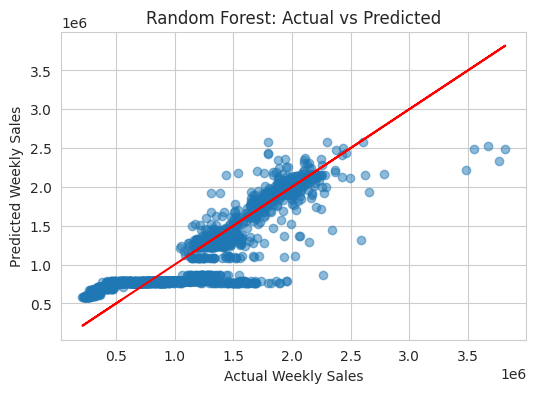

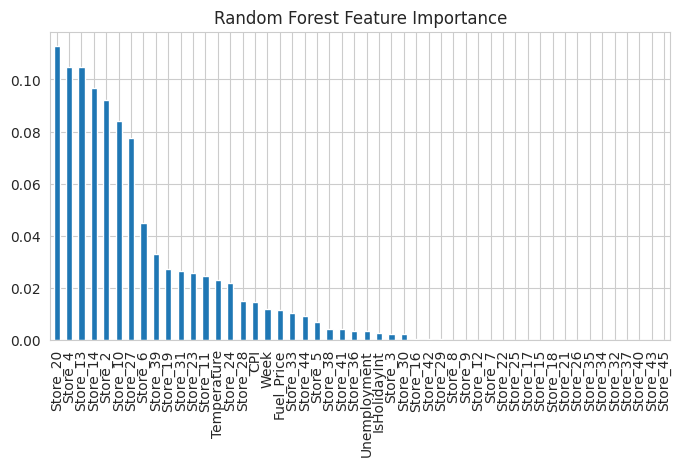

,Model,RMSE,R² Score
0,Linear Regression,163400.337254,0.916491
1,LASSO Regression,163402.490306,0.916491
2,Random Forest,281363.342410,0.752392


In [ ]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(YTest, YHatTest))
r2 = r2_score(YTest, YHatTest)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(XTrain, YTrain)
rf_pred = rf.predict(XTest)

rf_rmse = np.sqrt(mean_squared_error(YTest, rf_pred))
rf_r2 = r2_score(YTest, rf_pred)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)
plt.figure(figsize=(6,4))
plt.scatter(YTest, rf_pred, alpha=0.5)
plt.plot(YTest, YTest, color='red')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.show()
feature_importance = pd.Series(
    rf.feature_importances_,
    index=XTrain.columns
).sort_values(ascending=False)

feature_importance
feature_importance.plot(kind='bar', figsize=(8,4))
plt.title("Random Forest Feature Importance")
plt.show()
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'LASSO Regression', 'Random Forest'],
    'RMSE': [
        rmse,
        np.sqrt(testError.min()),   # from LASSO
        rf_rmse
    ],
    'R² Score': [
        r2,
        r2,   # similar baseline
        rf_r2
    ]
})

comparison